In [1]:
import numpy as np
import pandas as pd

import torch
import torchvision
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms, utils
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

from matplotlib import pyplot as plt
%matplotlib inline

# Create blob Train and Test data

In [3]:
# mu1 = np.array([3,3,3,3,0])
# sigma1 = np.array([[1,1,1,1,1],[1,16,1,1,1],[1,1,1,1,1],[1,1,1,1,1],[1,1,1,1,1]])

# mu2 = np.array([4,4,4,4,0])
# sigma2 = np.array([[16,1,1,1,1],[1,1,1,1,1],[1,1,1,1,1],[1,1,1,1,1],[1,1,1,1,1]])

# mu3 = np.array([10,5,5,10,0])
# sigma3 = np.array([[1,1,1,1,1],[1,16,1,1,1],[1,1,1,1,1],[1,1,1,1,1],[1,1,1,1,1]])

# mu4 = np.array([-10,-10,-10,-10,0])
# sigma4 = np.array([[1,1,1,1,1],[1,16,1,1,1],[1,1,1,1,1],[1,1,1,1,1],[1,1,1,1,1]])

# mu5 = np.array([-21,4,4,-21,0])
# sigma5 = np.array([[16,1,1,1,1],[1,1,1,1,1],[1,1,1,1,1],[1,1,1,1,1],[1,1,1,1,1]])

# mu6 = np.array([-10,18,18,-10,0])
# sigma6 = np.array([[1,1,1,1,1],[1,16,1,1,1],[1,1,1,1,1],[1,1,1,1,1],[1,1,1,1,1]])

# mu7 = np.array([4,20,4,20,0])
# sigma7 = np.array([[16,1,1,1,1],[1,1,1,1,1],[1,1,1,1,1],[1,1,1,1,1],[1,1,1,1,1]])

# mu8 = np.array([4,-20,-20,4,0])
# sigma8 = np.array([[16,1,1,1,1],[1,1,1,1,1],[1,1,1,1,1],[1,1,1,1,1],[1,1,1,1,1]])

# mu9 = np.array([20,20,20,20,0])
# sigma9 = np.array([[1,1,1,1,1],[1,16,1,1,1],[1,1,1,1,1],[1,1,1,1,1],[1,1,1,1,1]])

# mu10 = np.array([20,-10,-10,20,0])
# sigma10 = np.array([[1,1,1,1,1],[1,16,1,1,1],[1,1,1,1,1],[1,1,1,1,1],[1,1,1,1,1]])



# sample1 = np.random.multivariate_normal(mean=mu1,cov= sigma1,size=500)
# sample2 = np.random.multivariate_normal(mean=mu2,cov= sigma2,size=500)
# sample3 = np.random.multivariate_normal(mean=mu3,cov= sigma3,size=500)
# sample4 = np.random.multivariate_normal(mean=mu4,cov= sigma4,size=500)
# sample5 = np.random.multivariate_normal(mean=mu5,cov= sigma5,size=500)
# sample6 = np.random.multivariate_normal(mean=mu6,cov= sigma6,size=500)
# sample7 = np.random.multivariate_normal(mean=mu7,cov= sigma7,size=500)
# sample8 = np.random.multivariate_normal(mean=mu8,cov= sigma8,size=500)
# sample9 = np.random.multivariate_normal(mean=mu9,cov= sigma9,size=500)
# sample10 = np.random.multivariate_normal(mean=mu10,cov= sigma10,size=500)

(5000, 5) (5000, 1)


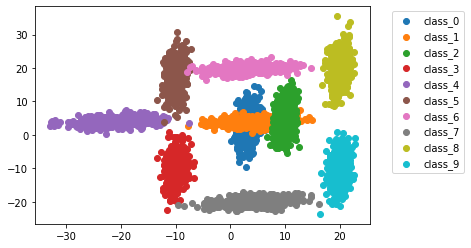

In [4]:
# X = np.concatenate((sample1,sample2,sample3,sample4,sample5,sample6,sample7,sample8,sample9,sample10),axis=0)
# Y = np.concatenate((np.zeros((500,1)),np.ones((500,1)),2*np.ones((500,1)),3*np.ones((500,1)),4*np.ones((500,1)),
#                     5*np.ones((500,1)),6*np.ones((500,1)),7*np.ones((500,1)),8*np.ones((500,1)),9*np.ones((500,1))),axis=0).astype(int)
# print(X.shape,Y.shape)
# plt.scatter(sample1[:,0],sample1[:,1],label="class_0")
# plt.scatter(sample2[:,0],sample2[:,1],label="class_1")
# plt.scatter(sample3[:,0],sample3[:,1],label="class_2")
# plt.scatter(sample4[:,0],sample4[:,1],label="class_3")
# plt.scatter(sample5[:,0],sample5[:,1],label="class_4")
# plt.scatter(sample6[:,0],sample6[:,1],label="class_5")
# plt.scatter(sample7[:,0],sample7[:,1],label="class_6")
# plt.scatter(sample8[:,0],sample8[:,1],label="class_7")
# plt.scatter(sample9[:,0],sample9[:,1],label="class_8")
# plt.scatter(sample10[:,0],sample10[:,1],label="class_9")
# plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

In [10]:
# class SyntheticDataset(Dataset):
#   """MosaicDataset dataset."""

#   def __init__(self, x, y):
#     """
#       Args:
#         csv_file (string): Path to the csv file with annotations.
#         root_dir (string): Directory with all the images.
#         transform (callable, optional): Optional transform to be applied
#             on a sample.
#     """
#     self.x = x
#     self.y = y
#     #self.fore_idx = fore_idx
    
#   def __len__(self):
#     return len(self.y)

#   def __getitem__(self, idx):
#     return self.x[idx] , self.y[idx] #, self.fore_idx[idx]

In [12]:
# trainset = SyntheticDataset(X,Y)
# trainloader = torch.utils.data.DataLoader(trainset, batch_size=100, shuffle=True)
# classes = ('zero','one','two','three','four','five','six','seven','eight','nine')

# foreground_classes = {'zero','one','two'}
# fg_used = '012'
# fg1, fg2, fg3 = 0,1,2


# all_classes = {'zero','one','two','three','four','five','six','seven','eight','nine'}
# background_classes = all_classes - foreground_classes
# background_classes

{'eight', 'five', 'four', 'nine', 'seven', 'six', 'three'}

In [13]:
# dataiter = iter(trainloader)
# background_data=[]
# background_label=[]
# foreground_data=[]
# foreground_label=[]
# batch_size=100

# for i in range(50):
#   images, labels = dataiter.next()
#   for j in range(batch_size):
#     if(classes[labels[j]] in background_classes):
#       img = images[j].tolist()
#       background_data.append(img)
#       background_label.append(labels[j])
#     else:
#       img = images[j].tolist()
#       foreground_data.append(img)
#       foreground_label.append(labels[j])
            
# foreground_data = torch.tensor(foreground_data)
# foreground_label = torch.tensor(foreground_label)
# background_data = torch.tensor(background_data)
# background_label = torch.tensor(background_label)

In [14]:
# def create_mosaic_img(bg_idx,fg_idx,fg): 
#   """
#   bg_idx : list of indexes of background_data[] to be used as background images in mosaic
#   fg_idx : index of image to be used as foreground image from foreground data
#   fg : at what position/index foreground image has to be stored out of 0-8
#   """
#   image_list=[]
#   j=0
#   for i in range(9):
#     if i != fg:
#       image_list.append(background_data[bg_idx[j]])
#       j+=1
#     else: 
#       image_list.append(foreground_data[fg_idx])
#       label = foreground_label[fg_idx] - fg1  # minus fg1 because our fore ground classes are fg1,fg2,fg3 but we have to store it as 0,1,2
#   #image_list = np.concatenate(image_list ,axis=0)
#   image_list = torch.stack(image_list) 
#   return image_list,label

In [16]:
# # number of data points in bg class and fg class
# nbg = 500*7
# nfg   = 500*3

# print(nbg, nfg, nbg+nfg)

3500 1500 5000


In [18]:
# desired_num = 3000
# mosaic_list_of_images =[]      # list of mosaic images, each mosaic image is saved as list of 9 images
# fore_idx =[]                   # list of indexes at which foreground image is present in a mosaic image i.e from 0 to 9               
# mosaic_label=[]                # label of mosaic image = foreground class present in that mosaic
# list_set_labels = [] 
# for i in range(desired_num):
#   set_idx = set()
#   np.random.seed(i)
#   bg_idx = np.random.randint(0,nbg,8)
#   set_idx = set(background_label[bg_idx].tolist())
#   fg_idx = np.random.randint(0,nfg)
#   set_idx.add(foreground_label[fg_idx].item())
#   fg = np.random.randint(0,9)
#   fore_idx.append(fg)
#   image_list,label = create_mosaic_img(bg_idx,fg_idx,fg)
#   mosaic_list_of_images.append(image_list)
#   mosaic_label.append(label)
#   list_set_labels.append(set_idx)


In [19]:
# desired_num = 2000
# test_mosaic_list_of_images =[]      # list of mosaic images, each mosaic image is saved as list of 9 images
# test_fore_idx =[]                   # list of indexes at which foreground image is present in a mosaic image i.e from 0 to 9               
# test_mosaic_label=[]                # label of mosaic image = foreground class present in that mosaic
# test_list_set_labels = [] 
# for i in range(desired_num):
#   set_idx = set()
#   np.random.seed(i+3000)
#   bg_idx = np.random.randint(0,nbg,8)
#   set_idx = set(background_label[bg_idx].tolist())
#   fg_idx = np.random.randint(0,nfg)
#   set_idx.add(foreground_label[fg_idx].item())
#   fg = np.random.randint(0,9)
#   test_fore_idx.append(fg)
#   test_image_list,test_label = create_mosaic_img(bg_idx,fg_idx,fg)
#   test_mosaic_list_of_images.append(test_image_list)
#   test_mosaic_label.append(test_label)
#   test_list_set_labels.append(set_idx)


In [21]:
# data =  [{"mosaic_list":mosaic_list_of_images, "mosaic_label": mosaic_label, "fore_idx":fore_idx}]
# np.save("train_blob_data.npy",data)

In [22]:
# data =  [{"mosaic_list":test_mosaic_list_of_images, "mosaic_label": test_mosaic_label, "fore_idx":test_fore_idx}]
# np.save("test_blob_data.npy",data)

# load mosaic data

In [23]:
class MosaicDataset1(Dataset):
  """MosaicDataset dataset."""

  def __init__(self, mosaic_list, mosaic_label,fore_idx):
    """
      Args:
        csv_file (string): Path to the csv file with annotations.
        root_dir (string): Directory with all the images.
        transform (callable, optional): Optional transform to be applied
            on a sample.
    """
    self.mosaic = mosaic_list
    self.label = mosaic_label
    self.fore_idx = fore_idx
    
  def __len__(self):
    return len(self.label)

  def __getitem__(self, idx):
    return self.mosaic[idx] , self.label[idx] , self.fore_idx[idx]

In [25]:
train_data = np.load("train_blob_data.npy",allow_pickle=True)
test_data = np.load("test_blob_data.npy",allow_pickle=True)

In [26]:
train_mosaic_list_of_images = train_data[0]["mosaic_list"]
train_mosaic_label = train_data[0]["mosaic_label"]
train_fore_idx = train_data[0]["fore_idx"]


test_mosaic_list_of_images = test_data[0]["mosaic_list"]
test_mosaic_label = test_data[0]["mosaic_label"]
test_fore_idx = test_data[0]["fore_idx"]

In [27]:
batch = 250
tr_msd = MosaicDataset1(train_mosaic_list_of_images, train_mosaic_label, train_fore_idx)
train_loader = DataLoader( tr_msd,batch_size= batch ,shuffle=True)

In [28]:
batch = 250
tst_msd = MosaicDataset1(test_mosaic_list_of_images, test_mosaic_label, test_fore_idx)
test_loader = DataLoader( tst_msd,batch_size= batch ,shuffle=True)

# models

In [29]:
class Module1(nn.Module):
  def __init__(self):
    super(Module1, self).__init__()
    self.fc1 = nn.Linear(5, 100)
    self.fc2 = nn.Linear(100, 1)

  def forward(self, z):
    x = torch.zeros([batch,9],dtype=torch.float64)
    y = torch.zeros([batch,5], dtype=torch.float64)
    x,y = x.to("cuda"),y.to("cuda")
    for i in range(9):
      x[:,i] = self.helper(z[:,i])[:,0]
    x = F.softmax(x,dim=1)   # alphas
    

    for i in range(9):            
      x1 = x[:,i]          
      y = y + torch.mul(x1[:,None],z[:,i])
    return y , x 
  
  def helper(self,x):
    x = F.relu(self.fc1(x))
    x = self.fc2(x)
    return x
      


In [30]:
 class Module2(nn.Module):
  def __init__(self):
    super(Module2, self).__init__()
    self.fc1 = nn.Linear(5, 100)
    self.fc2 = nn.Linear(100, 3)

  def forward(self,y):  
    y = F.relu(self.fc1(y))
    y = self.fc2(y)
    return y


In [31]:
torch.manual_seed(1234)
where_net = Module1().double()
where_net = where_net.to("cuda")
# print(net.parameters)
torch.manual_seed(1234)
what_net = Module2().double()
what_net = what_net.to("cuda")

In [32]:
def calculate_attn_loss(dataloader,what,where,criter):
  what.eval()
  where.eval()
  r_loss = 0
  alphas = []
  lbls = []
  pred = []
  fidices = []
  correct = 0
  tot = 0
  with torch.no_grad():
    for i, data in enumerate(dataloader, 0):
      inputs, labels,fidx = data
      lbls.append(labels)
      fidices.append(fidx)
      inputs = inputs.double()
      inputs, labels = inputs.to("cuda"),labels.to("cuda")
      avg,alpha = where(inputs)
      outputs = what(avg)
      _, predicted = torch.max(outputs.data, 1)
      correct += sum(predicted == labels)
      tot += len(predicted)
      pred.append(predicted.cpu().numpy())
      alphas.append(alpha.cpu().numpy())
      loss = criter(outputs, labels)
      r_loss += loss.item()
  alphas = np.concatenate(alphas,axis=0)
  pred = np.concatenate(pred,axis=0)
  lbls = np.concatenate(lbls,axis=0)
  fidices = np.concatenate(fidices,axis=0)
  #print(alphas.shape,pred.shape,lbls.shape,fidices.shape) 
  analysis = analyse_data(alphas,lbls,pred,fidices)
  return r_loss/i,analysis,correct.item(),tot,correct.item()/tot

In [33]:
def analyse_data(alphas,lbls,predicted,f_idx):
    '''
       analysis data is created here
    '''
    batch = len(predicted)
    amth,alth,ftpt,ffpt,ftpf,ffpf = 0,0,0,0,0,0
    for j in range (batch):
      focus = np.argmax(alphas[j])
      if(alphas[j][focus] >= 0.5):
        amth +=1
      else:
        alth +=1
      if(focus == f_idx[j] and predicted[j] == lbls[j]):
        ftpt += 1
      elif(focus != f_idx[j] and predicted[j] == lbls[j]):
        ffpt +=1
      elif(focus == f_idx[j] and predicted[j] != lbls[j]):
        ftpf +=1
      elif(focus != f_idx[j] and predicted[j] != lbls[j]):
        ffpf +=1
    #print(sum(predicted==lbls),ftpt+ffpt)
    return [ftpt,ffpt,ftpf,ffpf,amth,alth]

# training

In [34]:
# instantiate optimizer
optimizer_where = optim.RMSprop(where_net.parameters(),lr =0.001)#,nesterov=True)
optimizer_what = optim.RMSprop(what_net.parameters(), lr=0.001)#,nesterov=True)
 

criterion = nn.CrossEntropyLoss()
acti = []
analysis_data_tr = []
analysis_data_tst = []
loss_curi_tst = []
loss_curi_tr = []
epochs = 450

every_what_epoch = 20

# calculate zeroth epoch loss and FTPT values
running_loss,anlys_data,correct,total,accuracy = calculate_attn_loss(train_loader,what_net,where_net,criterion)
print('training epoch: [%d ] loss: %.3f correct: %.3f, total: %.3f, accuracy: %.3f' %(0,running_loss,correct,total,accuracy)) 
loss_curi_tr.append(running_loss)
analysis_data_tr.append(anlys_data)



running_loss,anlys_data,correct,total,accuracy = calculate_attn_loss(test_loader,what_net,where_net,criterion)
print('test epoch: [%d ] loss: %.3f correct: %.3f, total: %.3f, accuracy: %.3f' %(0,running_loss,correct,total,accuracy)) 

loss_curi_tst.append(running_loss)
analysis_data_tst.append(anlys_data)


# training starts 
for epoch in range(epochs): # loop over the dataset multiple times
  ep_lossi = []
  running_loss = 0.0
  what_net.train()
  where_net.train()
  if ((epoch) % (every_what_epoch*2) ) <= every_what_epoch-1 :
    print(epoch+1,"updating what_net, where_net is freezed")
    print("--"*40)
  elif ((epoch) % (every_what_epoch*2)) > every_what_epoch-1 :
    print(epoch+1,"updating where_net, what_net is freezed")
    print("--"*40)
  for i, data in enumerate(train_loader, 0):
    # get the inputs
    inputs, labels,_ = data
    inputs = inputs.double()
    inputs, labels = inputs.to("cuda"),labels.to("cuda")
        
    # zero the parameter gradients
    optimizer_where.zero_grad()
    optimizer_what.zero_grad()
      
    # forward + backward + optimize
    avg, alpha = where_net(inputs)
    outputs = what_net(avg)
    loss = criterion(outputs, labels)

    # print statistics
    running_loss += loss.item()
    loss.backward()
    if ((epoch) % (every_what_epoch*2) ) <= every_what_epoch-1 :
      optimizer_what.step()
    elif ( (epoch) % (every_what_epoch*2)) > every_what_epoch-1 :
      optimizer_where.step()
  running_loss_tr,anls_data,correct,total,accuracy = calculate_attn_loss(train_loader,what_net,where_net,criterion)
  analysis_data_tr.append(anls_data)
  loss_curi_tr.append(running_loss_tr)   #loss per epoch
  print('training epoch: [%d ] loss: %.3f correct: %.3f, total: %.3f, accuracy: %.3f' %(epoch+1,running_loss_tr,correct,total,accuracy)) 


  # calculate loss for test data
  running_loss_tst,anls_data,correct,total,accuracy = calculate_attn_loss(test_loader,what_net,where_net,criterion)
  analysis_data_tst.append(anls_data)
  loss_curi_tst.append(running_loss_tst)   #loss per epoch
  print('test epoch: [%d ] loss: %.3f correct: %.3f, total: %.3f, accuracy: %.3f' %(epoch+1,running_loss_tst,correct,total,accuracy)) 


  if running_loss_tr<=0.05:
    break
  # if ((epoch) % (every_what_epoch*2) ) <= every_what_epoch-1 :
  #   scheduler_what.step(running_loss_val)
  # elif ( (epoch) % (every_what_epoch*2)) > every_what_epoch-1 :
  #   scheduler_where.step(running_loss_val)
print('Finished Training run ')
analysis_data_tr = np.array(analysis_data_tr) 
analysis_data_tst = np.array(analysis_data_tst)

training epoch: [0 ] loss: 1.909 correct: 997.000, total: 3000.000, accuracy: 0.332
test epoch: [0 ] loss: 2.080 correct: 613.000, total: 2000.000, accuracy: 0.306
1 updating what_net, where_net is freezed
--------------------------------------------------------------------------------
training epoch: [1 ] loss: 1.181 correct: 1047.000, total: 3000.000, accuracy: 0.349
test epoch: [1 ] loss: 1.249 correct: 636.000, total: 2000.000, accuracy: 0.318
2 updating what_net, where_net is freezed
--------------------------------------------------------------------------------
training epoch: [2 ] loss: 1.172 correct: 1173.000, total: 3000.000, accuracy: 0.391
test epoch: [2 ] loss: 1.232 correct: 770.000, total: 2000.000, accuracy: 0.385
3 updating what_net, where_net is freezed
--------------------------------------------------------------------------------
training epoch: [3 ] loss: 1.159 correct: 1211.000, total: 3000.000, accuracy: 0.404
test epoch: [3 ] loss: 1.233 correct: 732.000, total

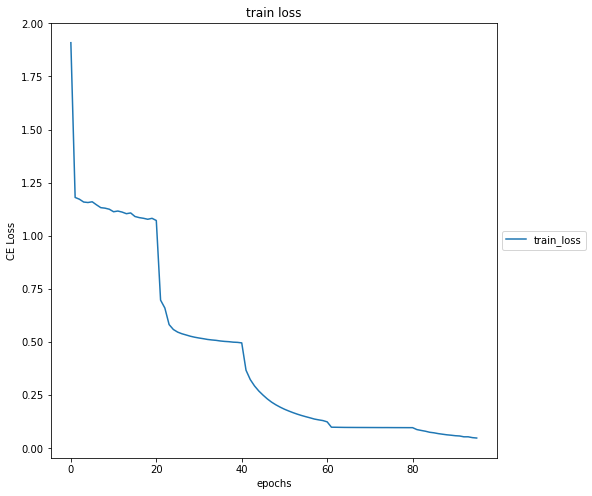

In [35]:
fig = plt.figure(figsize = (8,8)) 
vline_list = np.arange(every_what_epoch, epoch + every_what_epoch, every_what_epoch)
# train_loss = np.random.randn(340)
# test_loss = np.random.randn(340)
epoch_list = np.arange(0, epoch+2)
plt.plot(epoch_list,loss_curi_tr, label='train_loss')
#plt.plot(epoch_list,loss_curi_tst, label='test_loss')

plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.xlabel("epochs")
plt.ylabel("CE Loss")
#plt.vlines(vline_list,min(min(loss_curi_tr),min(loss_curi_tst)), max(max(loss_curi_tst),max(loss_curi_tr)),linestyles='dotted')
plt.title("train loss")
plt.show()
fig.savefig("train_loss_every_20_plot.pdf")
fig.savefig("train_loss_every_20_plot.png")

In [36]:
analysis_data_tr

array([[ 163,  834, 1624,  379,  433, 2567],
       [ 266,  781, 1521,  432,  433, 2567],
       [ 784,  389, 1003,  824,  433, 2567],
       [ 513,  698, 1274,  515,  433, 2567],
       [ 895,  418,  892,  795,  433, 2567],
       [ 854,  418,  933,  795,  433, 2567],
       [ 998,  404,  789,  809,  433, 2567],
       [ 727,  637, 1060,  576,  433, 2567],
       [ 984,  524,  803,  689,  433, 2567],
       [1004,  503,  783,  710,  433, 2567],
       [ 771,  694, 1016,  519,  433, 2567],
       [1034,  477,  753,  736,  433, 2567],
       [ 552,  774, 1235,  439,  433, 2567],
       [ 933,  591,  854,  622,  433, 2567],
       [ 573,  771, 1214,  442,  433, 2567],
       [ 912,  632,  875,  581,  433, 2567],
       [ 808,  694,  979,  519,  433, 2567],
       [ 837,  687,  950,  526,  433, 2567],
       [ 794,  707,  993,  506,  433, 2567],
       [ 942,  599,  845,  614,  433, 2567],
       [ 838,  699,  949,  514,  433, 2567],
       [1476,  737,  669,  118, 2249,  751],
       [15

In [37]:
analysis_data_tst

array([[ 117,  496, 1117,  270,  285, 1715],
       [ 179,  457, 1055,  309,  285, 1715],
       [ 511,  259,  723,  507,  285, 1715],
       [ 324,  408,  910,  358,  285, 1715],
       [ 584,  253,  650,  513,  285, 1715],
       [ 608,  249,  626,  517,  285, 1715],
       [ 659,  243,  575,  523,  285, 1715],
       [ 472,  369,  762,  397,  285, 1715],
       [ 645,  297,  589,  469,  285, 1715],
       [ 656,  293,  578,  473,  285, 1715],
       [ 505,  406,  729,  360,  285, 1715],
       [ 671,  285,  563,  481,  285, 1715],
       [ 365,  445,  869,  321,  285, 1715],
       [ 607,  336,  627,  430,  285, 1715],
       [ 361,  449,  873,  317,  285, 1715],
       [ 608,  358,  626,  408,  285, 1715],
       [ 532,  387,  702,  379,  285, 1715],
       [ 565,  386,  669,  380,  285, 1715],
       [ 524,  399,  710,  367,  285, 1715],
       [ 636,  343,  598,  423,  285, 1715],
       [ 557,  389,  677,  377,  285, 1715],
       [1018,  464,  445,   73, 1545,  455],
       [10

In [38]:
columns = ["epochs", "argmax > 0.5" ,"argmax < 0.5", "focus_true_pred_true", "focus_false_pred_true", "focus_true_pred_false", "focus_false_pred_false" ]
df_train = pd.DataFrame()
df_test = pd.DataFrame()
df_train[columns[0]] = np.arange(0,epoch+2)
df_train[columns[1]] = analysis_data_tr[:,-2]
df_train[columns[2]] = analysis_data_tr[:,-1]
df_train[columns[3]] = analysis_data_tr[:,0]/30
df_train[columns[4]] = analysis_data_tr[:,1]/30
df_train[columns[5]] = analysis_data_tr[:,2]/30
df_train[columns[6]] = analysis_data_tr[:,3]/30

df_test[columns[0]] = np.arange(0,epoch+2)
df_test[columns[1]] = analysis_data_tst[:,-2]
df_test[columns[2]] = analysis_data_tst[:,-1]
df_test[columns[3]] = analysis_data_tst[:,0]/20
df_test[columns[4]] = analysis_data_tst[:,1]/20
df_test[columns[5]] = analysis_data_tst[:,2]/20
df_test[columns[6]] = analysis_data_tst[:,3]/20

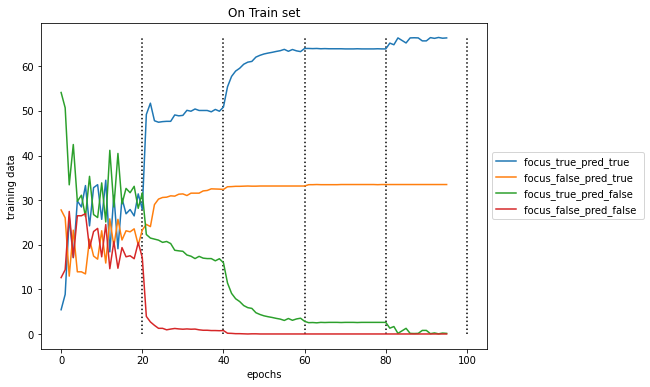

In [42]:
# plt.figure(figsize=(12,12))
# plt.plot(df_train[columns[0]],df_train[columns[1]], label='argmax > 0.5')
# plt.plot(df_train[columns[0]],df_train[columns[2]], label='argmax < 0.5')

# plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
# plt.xlabel("epochs")
# plt.ylabel("training data")
# plt.title("On Training set")
# #plt.vlines(vline_list,min(min(df_train[columns[1]]),min(df_train[columns[2]])), max(max(df_train[columns[1]]),max(df_train[columns[2]])),linestyles='dotted')
# plt.show()

fig=plt.figure(figsize=(8,6))
plt.plot(df_train[columns[0]],df_train[columns[3]], label ="focus_true_pred_true ")
plt.plot(df_train[columns[0]],df_train[columns[4]], label ="focus_false_pred_true ")
plt.plot(df_train[columns[0]],df_train[columns[5]], label ="focus_true_pred_false ")
plt.plot(df_train[columns[0]],df_train[columns[6]], label ="focus_false_pred_false ")
plt.title("On Train set")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.xlabel("epochs")
plt.ylabel("training data")
plt.vlines(vline_list,min(min(df_train[columns[3]]),min(df_train[columns[4]]),min(df_train[columns[5]]),min(df_train[columns[6]])), max(max(df_train[columns[3]]),max(df_train[columns[4]]),max(df_train[columns[5]]),max(df_train[columns[6]])),linestyles='dotted')
plt.show()
fig.savefig("train_analysis_every_20.pdf")
fig.savefig("train_analysis_every_20.png")

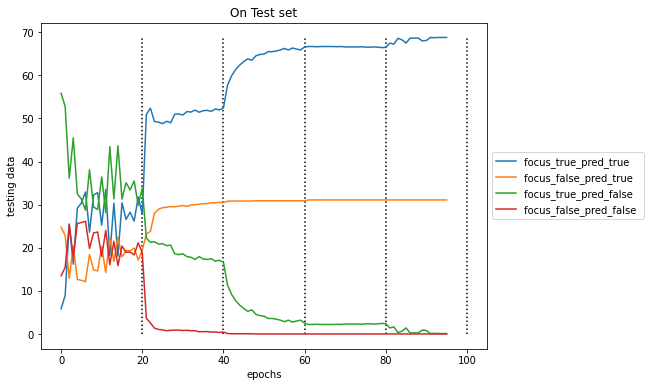

In [43]:
# plt.figure(figsize=(12,12))
# plt.plot(df_test[columns[0]],df_test[columns[1]], label='argmax > 0.5')
# plt.plot(df_test[columns[0]],df_test[columns[2]], label='argmax < 0.5')

# plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
# plt.xlabel("epochs")
# plt.ylabel("test data")
# plt.title("On Testing set")
# #plt.vlines(vline_list,min(min(df_test[columns[1]]),min(df_test[columns[2]])), max(max(df_test[columns[1]]),max(df_test[columns[2]])),linestyles='dotted')
# plt.show()

fig=plt.figure(figsize=(8,6))
plt.plot(df_test[columns[0]],df_test[columns[3]], label ="focus_true_pred_true ")
plt.plot(df_test[columns[0]],df_test[columns[4]], label ="focus_false_pred_true ")
plt.plot(df_test[columns[0]],df_test[columns[5]], label ="focus_true_pred_false ")
plt.plot(df_test[columns[0]],df_test[columns[6]], label ="focus_false_pred_false ")
plt.title("On Test set")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.xlabel("epochs")
plt.ylabel("testing data")
plt.vlines(vline_list,min(min(df_test[columns[3]]),min(df_test[columns[4]]),min(df_test[columns[5]]),min(df_test[columns[6]])), max(max(df_test[columns[3]]),max(df_test[columns[4]]),max(df_test[columns[5]]),max(df_test[columns[6]])),linestyles='dotted')
plt.show()
fig.savefig("test_analysis_every_20.pdf")
fig.savefig("test_analysis_every_20.png")